In [1]:
import numpy as np
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

In [2]:
# Paramètres de modèle / données
num_classes = 10
input_shape = (28, 28, 1)

# les données, réparties entre le train et les ensembles de test / base de données
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#Mettre les images à l'échelle dans la plage [0, 1]
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255


In [3]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# convertir les vecteurs de classe en matrices de classes binaires
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
x_train.shape

(60000, 28, 28, 1)

In [6]:
model = keras.Sequential([keras.Input(shape=input_shape)])

In [7]:
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu"))

In [8]:
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

In [9]:
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))

In [10]:
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

In [11]:
model.add(layers.Flatten())

In [12]:
model.add(layers.Dropout(0.5))

In [13]:
model.add(layers.Dense(num_classes, activation="softmax"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [15]:
batch_size = 128
epochs = 25

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/25
422/422 [==============================] - 70s 164ms/step - loss: 0.3711 - accuracy: 0.8879 - val_loss: 0.0832 - val_accuracy: 0.9778
Epoch 2/25
422/422 [==============================] - 67s 160ms/step - loss: 0.1110 - accuracy: 0.9672 - val_loss: 0.0616 - val_accuracy: 0.9823
Epoch 3/25
422/422 [==============================] - 72s 170ms/step - loss: 0.0870 - accuracy: 0.9732 - val_loss: 0.0505 - val_accuracy: 0.9858
Epoch 4/25
422/422 [==============================] - 76s 180ms/step - loss: 0.0722 - accuracy: 0.9771 - val_loss: 0.0459 - val_accuracy: 0.9872
Epoch 5/25
422/422 [==============================] - 68s 161ms/step - loss: 0.0634 - accuracy: 0.9804 - val_loss: 0.0484 - val_accuracy: 0.9847
Epoch 6/25
422/422 [==============================] - 68s 161ms/step - loss: 0.0589 - accuracy: 0.9815 - val_loss: 0.0381 - val_accuracy: 0.9897
Epoch 7/25
422/422 [==============================] - 70s 165ms/step - loss: 0.0529 - accuracy: 0.9829 - val_loss: 0.0347 - val_ac

In [ ]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 3s 8ms/step - loss: 0.0231 - accuracy: 0.9930
Test loss: 0.023054203018546104
Test accuracy: 0.9929999709129333


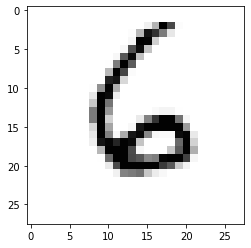

In [ ]:
image_index =600
# image_index = 
plt.imshow(x_test[image_index].reshape(28, 28), cmap='Greys')

In [ ]:
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

9


In [ ]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

In [ ]:
loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

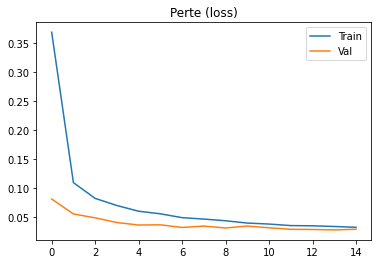

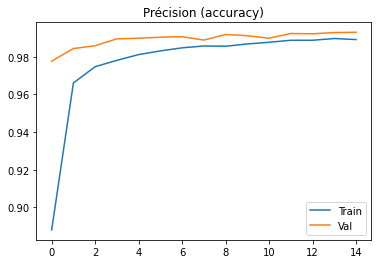

In [ ]:
plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper right')
plt.title("Perte (loss)") 
plt.show()
plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='lower right')
plt.title("Précision (accuracy)") 
plt.show()

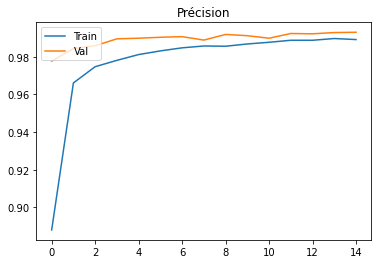

In [ ]:
plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Précision")
plt.show()